# Visualizing Image Changes
In this notebook we explore the difference seen in the images after applying a histogram equalizer to each image. 
Can we mathematically express what is happening to the image? At leas in terms of the intensities?
How about looking at the distributions of its intensities?

Don't do this for a large subset but at least of 100 images to truly analyze what is going on with all of them. 

In [42]:
# importing some libraries
import numpy as np
import matplotlib.pyplot as plt 
from os.path import join
from skimage import color, io, morphology, img_as_ubyte, feature, exposure, filters, util
from skimage.filters import frangi, hessian
import pandas as pd
from skimage import exposure
import os
import warnings
warnings.filterwarnings("ignore")

In [17]:
# obtain some images
ic_fib100 = io.ImageCollection("Data/fib_100/*.tif", conserve_memory = True)
ic_nofib100 = io.ImageCollection("Data/nofib_100/*.tif", conserve_memory = True)

**We first compare two images with Fibers**

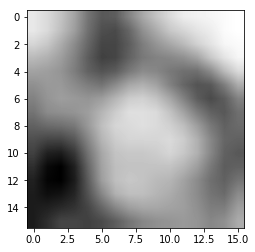

In [18]:
first = ic_fib100[1]
plt.imshow(first, cmap = 'gray', interpolation = 'bilinear')

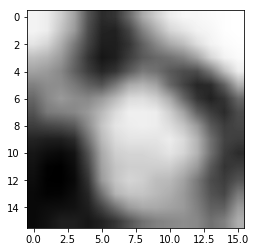

In [19]:
first_equalized = exposure.equalize_hist(ic_fib100[1])
plt.imshow(first_equalized, cmap = 'gray', interpolation = 'bilinear')

**Now we compare two images with No fibers**

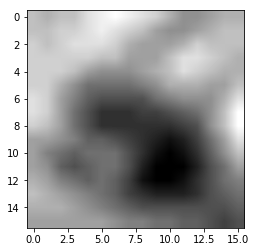

In [20]:
first_nofib = ic_nofib100[1]
plt.imshow(first_nofib, cmap = 'gray', interpolation = 'bilinear')

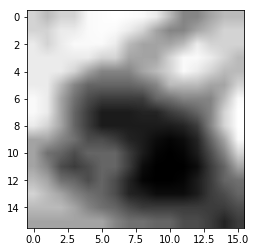

In [21]:
first_nofibeq = exposure.equalize_hist(ic_nofib100[1])
plt.imshow(first_nofibeq, cmap = 'gray', interpolation = 'bilinear')

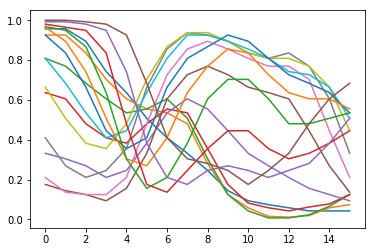

In [22]:
plt.plot(first_equalized)

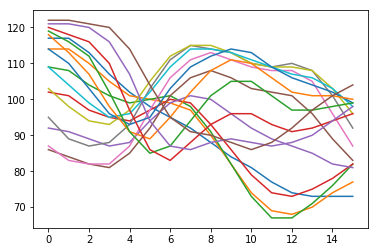

In [23]:
plt.plot(first)

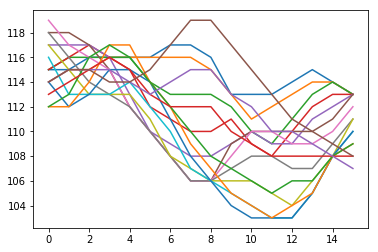

In [24]:
plt.plot(first_nofib)

What is we are able to analyze the pixel intensities thtrough a distribution? How different will it be after we apply the histogram equalizer?

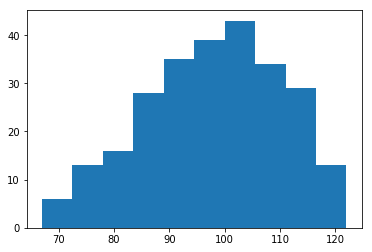

In [25]:
plt.hist(first.flatten())
plt.show()

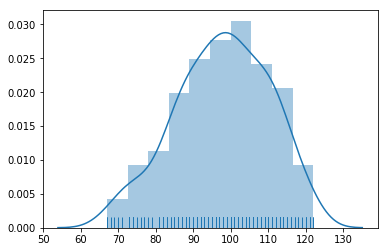

In [26]:
import seaborn as sns, numpy as np
ax = sns.distplot(first.flatten(), rug=True)

### At a First Glance
It seems as though the overa shpe of the pixel intensities remains the same. What changes is that now the pixel intensities are normalized, perhaps making it easier for the network to handle and therefore predict the actual labels of each image. Additionally the distribution of the pixel intensities look sifnificantly different with fibers vs no fibers.

**is there a better plot to depict the intensities of all?**
Yes, using distplot! we can see the distribution of each image according to its pixel values.

## Comparing all Images along with their histogram

In [47]:
#title = fiber_collection.files[fib].split('/')[-1]
save_file = ic_fib100.files[0].split('/')[-1]

def imageComparisson(imageCollection, numImages, folderTitle):
    
    if not os.path.exists(folderTitle):
        os.makedirs(folderTitle)

    print('Generating Images')
    
    for idx in range(numImages):
        
        # title of each image
        file_title = imageCollection.files[idx].split('/')[-1]
        
        # plots
        fig, ax = plt.subplots(figsize = (10,8), ncols = 2, nrows=2)
        ax[0][0].imshow(imageCollection[idx], cmap = 'gray', interpolation = 'bilinear')
        sns.distplot(imageCollection[idx].flatten(), rug = True, ax = ax[0][1])
        ax[1][0].imshow(exposure.equalize_hist(imageCollection[idx]), cmap = 'gray', interpolation = 'bilinear')
        sns.distplot(exposure.equalize_hist(imageCollection[idx]).flatten(), rug = True, ax =ax[1][1])
        plt.suptitle("Original vs Standardized (Equalized)", fontsize=20)
        ax[0][0].set_title("Original Fiber")
        ax[1][0].set_title("Equalized Fiber")
        ax[0][1].set_title("Distribution of Intensities - Normal")
        ax[1][1].set_title("Distribution of Intensities - Standarized")
        plt.savefig(folderTitle + '/' + file_title) 
        %matplotlib inline

    complete = 'Done!'    
    
    return complete
        

In [48]:
imageComparisson(ic_fib100, 100, 'Equalized_Fibers')

Generating Images


'Done!'

In [49]:
imageComparisson(ic_nofib100, 100, 'Equalized_noFibers')

Generating Images


'Done!'

## Complete: See folders "Equalized_Fibers and Equalized_noFibers"